In [33]:
%matplotlib qt
import sys
import mne
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\scripts")
sys.path.append(r"C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\config")
import eeg_preprocessing as preprocessing
import eeg_decoding as decoding
import vst_config as config

from mne.stats import permutation_t_test
from mne.stats import permutation_cluster_test

In [11]:
epochs_type = "start_prod"
baseline_duration = 0.1
epoch_duration = 4
pick_type = "all_channels"

subject = "VST_02_X"

low_freq = 4

Testing for only one condition

In [32]:
condition = "LNS"
epochs = preprocessing.load_subject_epochs_by_type_and_condition(subject, condition, epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)
data = epochs.get_data()

data = np.mean(data, axis=2)

n_permutations = 50000
T0, p_values, H0 = permutation_t_test(data, n_permutations, n_jobs=-1, seed=42)

C:\Users\gautier\AppData\Local\Temp/ipykernel_7736/207910970.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


Permuting 49999 times...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.7s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.8s finished


In [31]:
significant_sensors = np.array(epochs.info.ch_names)[p_values <= 0.05]

print("Number of significant sensors : %d" % len(significant_sensors))
print("Sensors names : %s" % significant_sensors)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 64 but corresponding boolean dimension is 1000

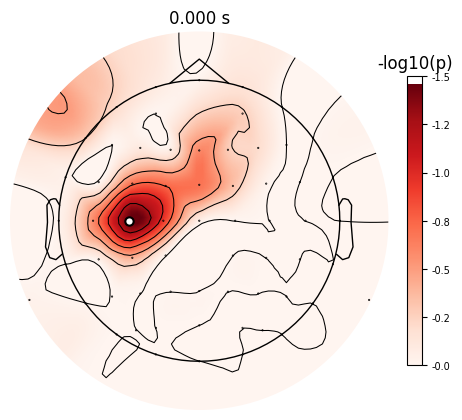

In [29]:
evoked = mne.EvokedArray(-np.log10(p_values)[:, np.newaxis], epochs.info, tmin=0.0)

# Extract mask and indices of active sensors in the layout
mask = p_values[:, np.newaxis] <= 0.05

evoked.plot_topomap(
    ch_type="eeg",
    times=[0],
    scalings=1,
    time_format=None,
    cmap="Reds",
    vlim=(0.0, np.max),
    units="-log10(p)",
    cbar_fmt="-%0.1f",
    mask=mask,
    size=3,
    show_names=lambda x: x[4:] + " " * 20,
    time_unit="s",
)

Retrieve significant electrodes for all conditions on start_prod epochs

In [ ]:
conditions = ["LNS", "LHS", "SNS", "SHS", "LNL", "LHL", "SNL", "SHL"]
for condition in conditions:
    epochs = preprocessing.load_subject_epochs_by_type_and_condition(subject, condition, epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)
    

Permutation cluster test on time series data

Testing on pairs of conditions

In [112]:
condition1_name = "LNS"
condition2_name = "LHS"

epochs1 = preprocessing.load_subject_epochs_by_type_and_condition(subject, condition1_name, epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)
epochs2 = preprocessing.load_subject_epochs_by_type_and_condition(subject, condition2_name, epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)


condition1 = epochs1.get_data()  
condition2 = epochs2.get_data() 
print(condition1.shape)
condition1 = condition1.reshape(condition1.shape[0], condition1.shape[2], condition1.shape[1])
condition2 = condition2.reshape(condition2.shape[0], condition2.shape[2], condition2.shape[1])
print(condition1.shape)

threshold = 6.0
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [condition1, condition2],
    n_permutations=1000,
    threshold=None,
    tail=1,
    n_jobs=-1,
    seed=42,
    out_type="mask",
)

print("Number of clusters : %d" % len(clusters))
print("Cluster p-values : %s" % cluster_p_values)

(104, 64, 1000)
(104, 1000, 64)
Using a threshold of 3.886996
stat_fun(H1): min=0.000000 max=21.482822
Running initial clustering …
Found 797 clusters


C:\Users\gautier\AppData\Local\Temp/ipykernel_7736/4067865149.py:8: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  condition1 = epochs1.get_data()
C:\Users\gautier\AppData\Local\Temp/ipykernel_7736/4067865149.py:9: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  condition2 = epochs2.get_data()
100%|██████████| Permuting : 999/999 [00:44<00:00,   22.61it/s]


Number of clusters : 797
Cluster p-values : [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    0.998 1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    0.979
 1.    1.    1.    1.    1.    0.998 1.    1.    1.    0.95  1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    0.998 1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    

In [113]:
print(np.array(clusters).shape)
print(min(cluster_p_values))

(797, 1000, 64)
0.446


In [115]:
print(len(cluster_p_values[cluster_p_values < 0.5]))
print(cluster_p_values[cluster_p_values < 0.5])

1
[0.446]


In [116]:
good_clusters = np.array(clusters)[np.where(cluster_p_values < 0.5)]
len(good_clusters)

1

In [117]:
good_cluster = good_clusters[0]
good_cluster.shape

(1000, 64)

In [118]:
channels_cluster = np.where(np.any(good_cluster, axis=0))
print(channels_cluster)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64),)


In [119]:
print(np.array(epochs1.info.ch_names)[channels_cluster])

['Fp1' 'Fpz' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC5' 'FC1' 'FC2' 'FC6' 'M1'
 'T7' 'C3' 'Cz' 'C4' 'T8' 'M2' 'CP5' 'CP1' 'CP2' 'CP6' 'P7']


In [120]:
times_cluster = np.where(np.any(good_cluster, axis=1))
print(times_cluster)

(array([484, 485], dtype=int64),)


In [129]:
# Plot the significant cluster for all channels doing a for loop
for i in range(len(channels_cluster)):
    channel = np.array(epochs1.info.ch_names)[channels_cluster][i]
    print(channel)
    times = epochs1.times
    fig, (ax, ax2) = plt.subplots(2, 1, figsize=(8, 4))
    ax.set_title("Channel : " + channel)
    ax.plot(
        times,
        condition1[:,:,channels_cluster[i]].mean(axis=0) - condition2[:,:,channels_cluster[i]].mean(axis=0),
        label="ERF Contrast (Event 1 - Event 2)",
    )
    ax.set_ylabel("MEG (T / m)")
    ax.legend()
    print(good_cluster)
    for i_c, c in enumerate(good_cluster):
        c = slice(int(c[0]), int(c[-1]) + 1)
        print(c)
        if cluster_p_values[i_c] <= 0.5:
            h = ax2.axvspan(times[c.start], times[c.stop - 1], color="r", alpha=0.3)
        else:
            ax2.axvspan(times[c.start], times[c.stop - 1], color=(0.3, 0.3, 0.3), alpha=0.3)
    
    hf = plt.plot(times, T_obs, "g")
    ax2.legend((h,), ("clusters p-value < 0.1",))
    ax2.set_xlabel("time (ms)")
    ax2.set_ylabel("f-values")

Fp1
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, None)
slice(0, 1, 

IndexError: index 797 is out of bounds for axis 0 with size 797